## Azure AI Foundry: Image Generattion with FLUX models

### Environment Setup
pip install requests pillow azure-identity

In [1]:
# Import required packages
import os
import requests
import base64
from io import BytesIO
from PIL import Image
from IPython.display import display
from azure.identity import DefaultAzureCredential

In [ ]:
# Set environment variables
AZURE_FOUNDRY_ENDPOINT_BFL = os.getenv(
    "AZURE_FOUNDRY_ENDPOINT_BFL",
    "https://<YOUR_RESOURCE>.services.ai.azure.com/"
)
FLUX_v1_DEPLOYMENT = os.getenv("FLUX_v1_DEPLOYMENT", "flux-1.1-pro")
FLUX_v2_DEPLOYMENT = os.getenv("FLUX_v2_DEPLOYMENT", "flux-2-pro")

In [3]:
# Set model configurations
FLUX_MODELS = {
    "flux-1.1-pro": {
        "endpoint": AZURE_FOUNDRY_ENDPOINT_BFL,
        "path": f"providers/blackforestlabs/v1/flux-pro-1.1",
        "api_version": "preview",
        "model_name": FLUX_v1_DEPLOYMENT
    },
    "flux-2-pro": {
        "endpoint": AZURE_FOUNDRY_ENDPOINT_BFL,
        "path": f"providers/blackforestlabs/v1/flux-2-pro",
        "api_version": "preview",
        "model_name": FLUX_v2_DEPLOYMENT
    }
}

In [4]:
# Retrieve Entra ID credentials
credential = DefaultAzureCredential()
token_response = credential.get_token("https://cognitiveservices.azure.com/.default")

In [5]:
# Define helper functions
def show_image(response_data):
    """Display image from API response."""
    if 'error' in response_data:
        print(f"Error: {response_data['error']}")
        return
    if 'data' not in response_data:
        print(f"Unexpected response: {response_data}")
        return
    
    data = response_data['data']
    b64_img = data[0]['b64_json']
    image = Image.open(BytesIO(base64.b64decode(b64_img)))
    display(image)

def generate_image(model_key, prompt, width=1024, height=1024, output_format="png"):
    """Generate an image using the specified FLUX model."""
    config = FLUX_MODELS[model_key]
    
    url = f"{config['endpoint']}{config['path']}?api-version={config['api_version']}"
    body = {
        "prompt": prompt,
        "n": 1,
        "width": width,
        "height": height,
        "output_format": output_format,
        "model": config["model_name"]
    }
    
    response = requests.post(
        url,
        headers = {
            'Authorization': 'Bearer ' + token_response.token,
            'Content-Type': 'application/json',
        },
        json=body
    )
    
    if response.status_code != 200:
        print(f"Status: {response.status_code}")
        print(f"URL: {url}")
        print(f"Response: {response.text[:500]}")
        return None

    result = response.json()
    show_image(result)

### Use of FLUX 1.1 Pro

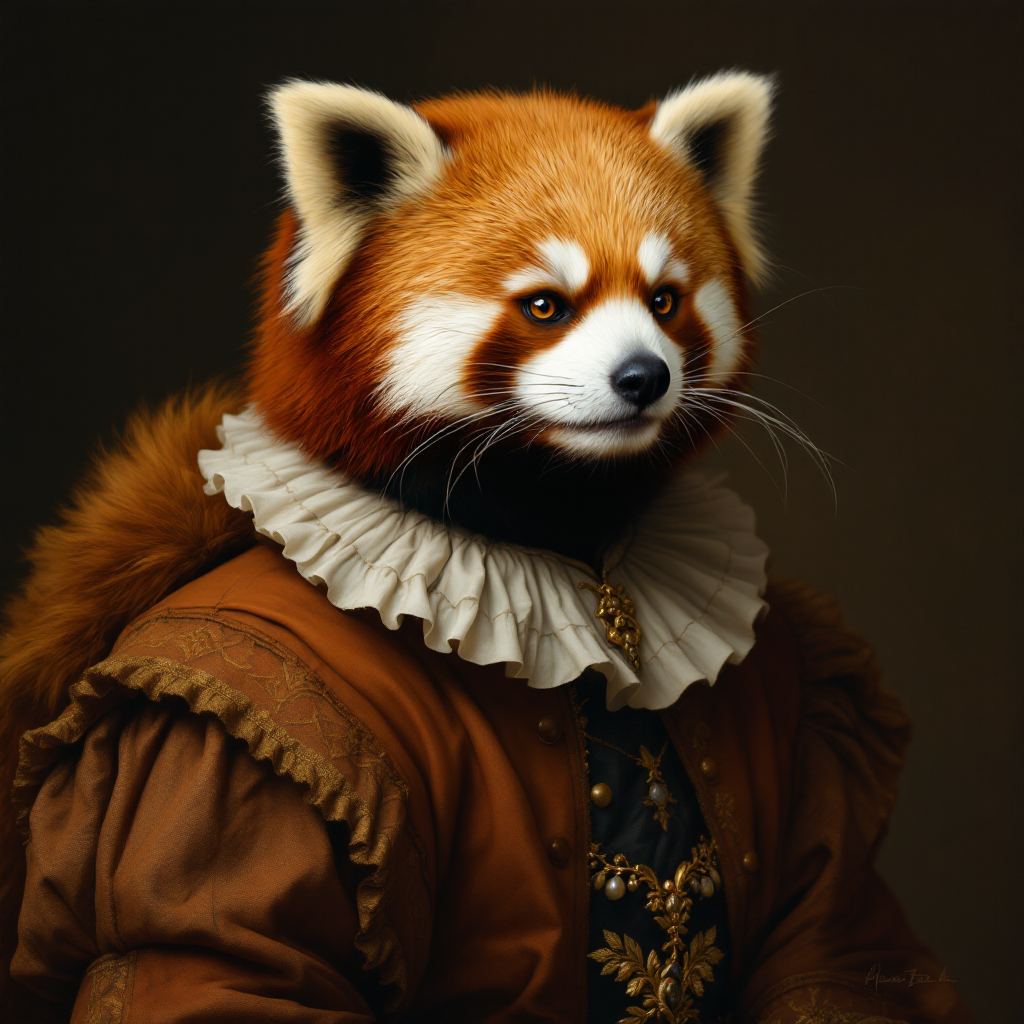

In [6]:
# Test image generation with FLUX-1.1-pro
generate_image(
    "flux-1.1-pro",
    "Portrait of a red panda in renaissance clothing in Rembrandt style, detailed, intricate, digital art"
)

### Use of FLUX 2 Pro

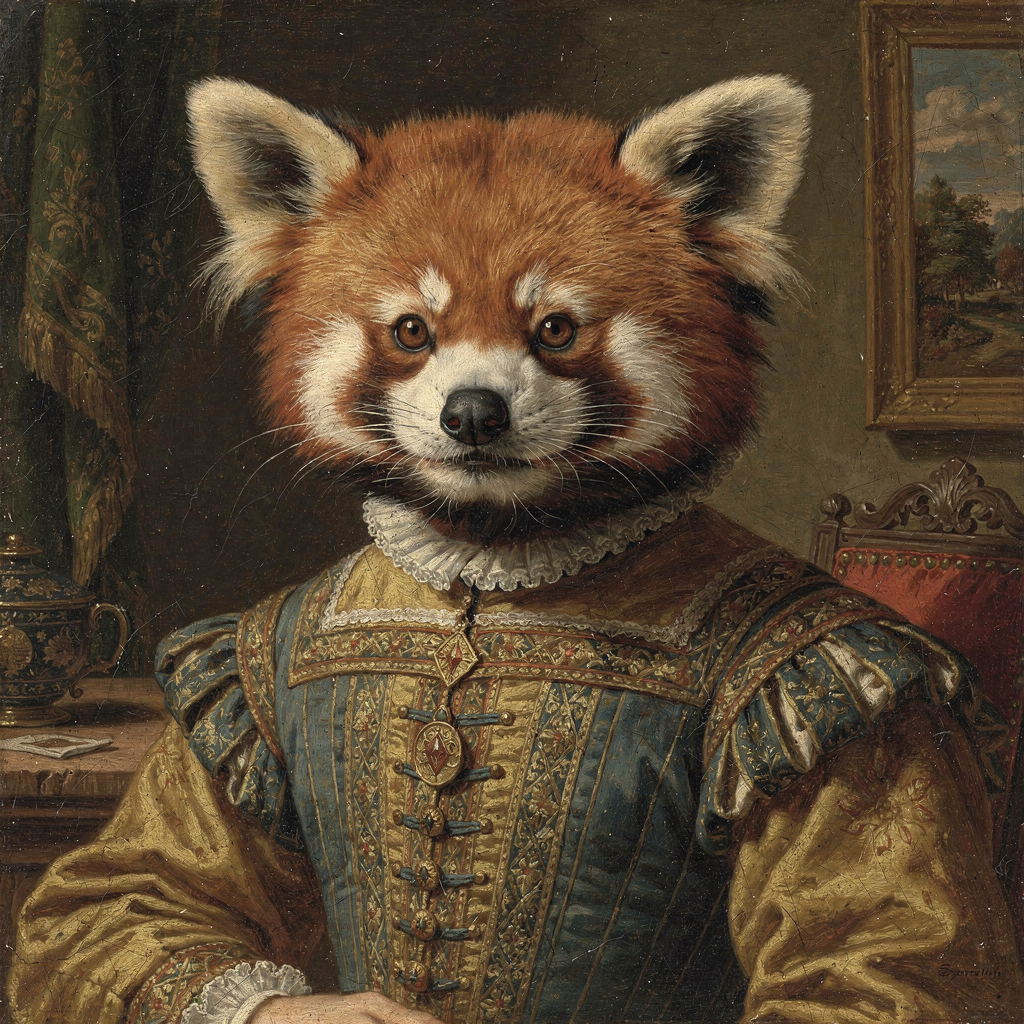

In [7]:
# Test image generation with FLUX-2-Pro
generate_image(
    "flux-2-pro",
    "Portrait of a red panda in renaissance clothing in Vermeer style, detailed, intricate, digital art"
)